<img src="../images/aeropython_logo.png" alt="AeroPython" style="width: 300px;"/>

# ScikitLearn: ejercicio práctico 

*En la clase anterior vimos una breve introducción a la Inteligencia Artificial con `scikit-learn`. A lo largo de esta clase aplicaremos el proceso para usar esta librería sobre un caso práctico, veremos algunas de preprocesado, dividiremos nuestros datos en los subconjuntos de entrenamiento, test y validación y ahondaremos en la selección de hiperparámetros.*

Recordemos que el proceso para usar `scikit-learn` es el siguiente:

1. Separar los datos en matriz de características `features` y variable a predecir `y`
2. Seleccionar el modelo
3. Elegir los hiperparámetros
4. Ajustar o entrenar el modelo (`model.fit`)
5. Predecir con datos nuevos (`model.predict`)

## Carga de los datos 

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# Cargamos el data set iris
iris = load_iris()

# Creamos un DataFrame para trabajar de manera más cómoda
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Convertimos target en un dato categórico
target = [iris.target_names[ii] for ii in iris.target]
target = pd.Categorical(target, iris.target_names)

# Añadimos target al DataFrame
data['target'] = target

data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Exploración de los datos 

In [3]:
# Agrupamos por clase y calculamos media y desv standard
data.groupby('target').agg(['mean', 'std'])

sepal length (cm)           sepal width (cm)            \
                        mean       std             mean       std   
target                                                              
setosa                 5.006  0.352490            3.418  0.381024   
versicolor             5.936  0.516171            2.770  0.313798   
virginica              6.588  0.635880            2.974  0.322497   

           petal length (cm)           petal width (cm)            
                        mean       std             mean       std  
target                                                             
setosa                 1.464  0.173511            0.244  0.107210  
versicolor             4.260  0.469911            1.326  0.197753  
virginica              5.552  0.551895            2.026  0.274650

In [4]:
from pandas.tools.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix

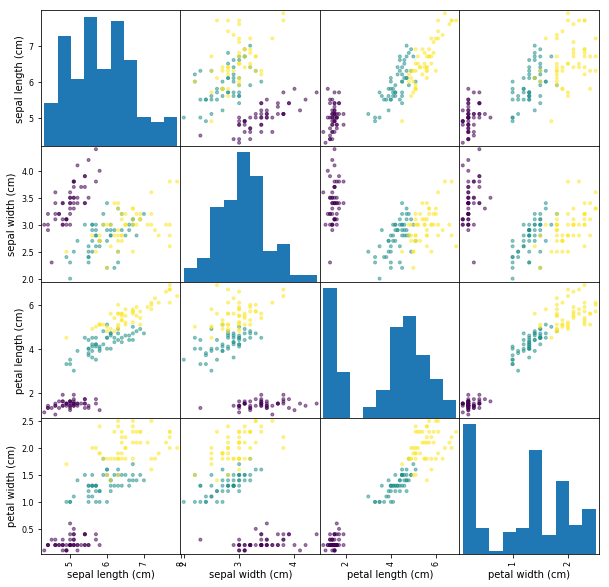

In [5]:
_ = scatter_matrix(data, c=data.target.cat.codes, figsize=(10, 10))

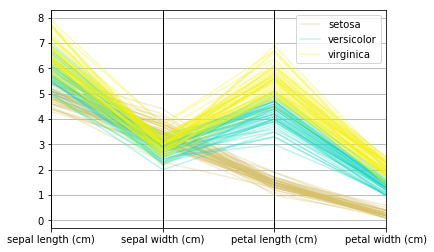

In [6]:
parallel_coordinates(data, 'target', alpha=0.3)

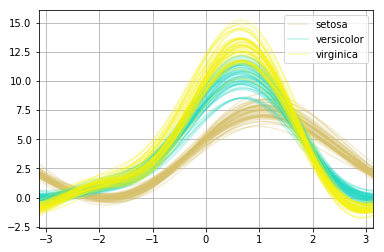

In [7]:
andrews_curves(data, 'target', alpha=0.3)

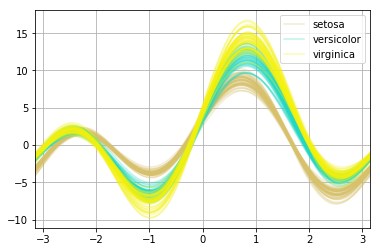

In [8]:
andrews_curves(data.iloc[:, ::-1], 'target', alpha=0.3)

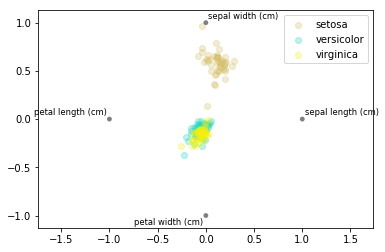

In [9]:
radviz(data, 'target', alpha=0.3)

## División en entrenamiento y test 

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
np.random.seed(12345)

X_train, X_test, Y_train, Y_test = train_test_split(data.iloc[:, :4], data.target, test_size=0.4)

In [12]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
109,7.2,3.6,6.1,2.5
143,6.8,3.2,5.9,2.3
124,6.7,3.3,5.7,2.1
93,5.0,2.3,3.3,1.0
125,7.2,3.2,6.0,1.8
95,5.7,3.0,4.2,1.2
37,4.9,3.1,1.5,0.1
49,5.0,3.3,1.4,0.2
66,5.6,3.0,4.5,1.5
6,4.6,3.4,1.4,0.3


## Normalización de los datos 

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [15]:
scaler.mean_

array([ 5.9       ,  3.03777778,  3.84666667,  1.22777778])

In [16]:
data.mean()

sepal length (cm)    5.843333
sepal width (cm)     3.054000
petal length (cm)    3.758667
petal width (cm)     1.198667
dtype: float64

## Clasificación con KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Creación del clasificador
clf = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Entrenamiento
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
# Acierto
clf.score(X_test, Y_test)

0.98333333333333328

## Selección de número de vecinos

### ¿Qué ocurre si variamos el número de vecinos? ¿y si solo tomamos uno?

Probemos a pasar los datos de entrenamiento para verlo más claro

In [20]:
# Creación del clasificador
clf = KNeighborsClassifier(n_neighbors=1)

# Entrenamiento
clf.fit(X_train, Y_train)
clf.score(X_train, Y_train)

1.0

In [21]:
clf.score(X_test, Y_test)

0.98333333333333328

La clasificación con un solo vecino asigna el mismo grupo al que pertenece el vecino más cercano

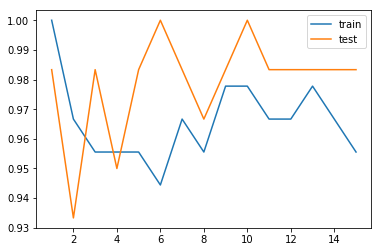

In [22]:
n_neighbours = np.arange(1, 16)
test_score = np.zeros_like(n_neighbours, dtype=float)
train_score = np.zeros_like(n_neighbours, dtype=float)

for ii, n in enumerate(n_neighbours):
    clf = KNeighborsClassifier(n_neighbors=n)
    # Entrenamiento
    clf.fit(X_train, Y_train)
    # Acierto     
    train_score[ii] = clf.score(X_train, Y_train)
    test_score[ii] = clf.score(X_test, Y_test)

plt.plot(n_neighbours, train_score, label='train')
plt.plot(n_neighbours, test_score, label='test')
plt.legend()

### ¿Cómo debemos fijar los hiperparámetros? 

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
n_neighbours = np.arange(1, 16)

params = {'n_neighbors': n_neighbours}

clf = GridSearchCV(KNeighborsClassifier(), params)

clf.fit(X_train.values, Y_train.codes)

GridSearchCV(cv=None, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

Una vez que se ha hecho el grid search, el objecto contiene información acerca del índice de acierto para cada valor de hiperparámetro en el atributo `.grid_scores_`:

In [25]:
clf.cv_results_

{'mean_fit_time': array([ 0.00035063,  0.00028745,  0.00029747,  0.00028316,  0.00028435,
         0.00025622,  0.00021982,  0.00022658,  0.00022054,  0.00022006,
         0.00023182,  0.00022046,  0.00022515,  0.00022054,  0.00022078]),
 'mean_score_time': array([ 0.00057777,  0.00055273,  0.00055997,  0.00056148,  0.000561  ,
         0.00051435,  0.00045451,  0.00045943,  0.00045228,  0.00044886,
         0.00044958,  0.00045149,  0.00046563,  0.0004797 ,  0.00049122]),
 'mean_test_score': array([ 0.9       ,  0.9       ,  0.92222222,  0.92222222,  0.93333333,
         0.91111111,  0.94444444,  0.9       ,  0.93333333,  0.94444444,
         0.94444444,  0.94444444,  0.93333333,  0.93333333,  0.93333333]),
 'mean_train_score': array([ 1.        ,  0.9666574 ,  0.96100769,  0.96100769,  0.96100769,
         0.96100769,  0.9666574 ,  0.96119292,  0.96119292,  0.9666574 ,
         0.9666574 ,  0.96110185,  0.95545213,  0.94989658,  0.94989658]),
 'param_n_neighbors': masked_array(data =

In [26]:
grid_scores = pd.DataFrame(clf.cv_results_)
grid_scores.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_n_neighbors,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.000351,0.000578,0.900000,1.000000,1,{'n_neighbors': 1},13,1.000000,1.000000,0.900000,1.0,0.793103,1.00000,7.579595e-05,0.000058,0.084418,0.000000
1,0.000287,0.000553,0.900000,0.966657,2,{'n_neighbors': 2},13,1.000000,0.949153,0.900000,1.0,0.793103,0.95082,6.132298e-06,0.000015,0.084418,0.023587
2,0.000297,0.000560,0.922222,0.961008,3,{'n_neighbors': 3},10,1.000000,0.932203,0.900000,1.0,0.862069,0.95082,1.781433e-05,0.000007,0.058431,0.028600
3,0.000283,0.000561,0.922222,0.961008,4,{'n_neighbors': 4},10,1.000000,0.932203,0.900000,1.0,0.862069,0.95082,5.619580e-07,0.000006,0.058431,0.028600
4,0.000284,0.000561,0.933333,0.961008,5,{'n_neighbors': 5},5,0.967742,0.932203,0.933333,1.0,0.896552,0.95082,1.072147e-06,0.000003,0.029047,0.028600


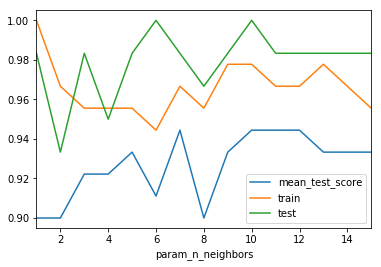

In [27]:
grid_scores.plot(x='param_n_neighbors', y='mean_test_score')

plt.plot(n_neighbours, train_score, label='train')
plt.plot(n_neighbours, test_score, label='test')
plt.legend()

In [28]:
clf.best_params_

{'n_neighbors': 7}

In [29]:
clf = KNeighborsClassifier(n_neighbors=7)

clf.fit(X_train, Y_train)

clf.score(X_test, Y_test)

0.98333333333333328

In [30]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(Y_test, clf.predict(X_test))

array([[21,  0,  0],
       [ 0, 21,  1],
       [ 0,  0, 17]])

Confusion matrix, without normalization


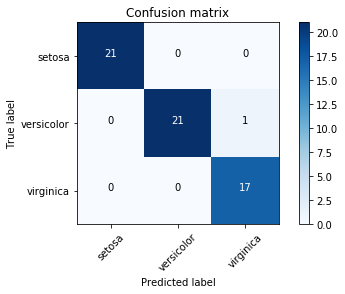

In [32]:
# From:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, clf.predict(X_test))
plot_confusion_matrix(cnf_matrix,
                      classes=iris.target_names,
                      title='Confusion matrix')

---
<br/>
#### <h4 align="right">¡Síguenos en Twitter!
<br/>
###### <a href="https://twitter.com/AeroPython" class="twitter-follow-button" data-show-count="false">Follow @AeroPython</a> <script>!function(d,s,id){var js,fjs=d.getElementsByTagName(s)[0],p=/^http:/.test(d.location)?'http':'https';if(!d.getElementById(id)){js=d.createElement(s);js.id=id;js.src=p+'://platform.twitter.com/widgets.js';fjs.parentNode.insertBefore(js,fjs);}}(document, 'script', 'twitter-wjs');</script> 
<br/>
###### Este notebook ha sido realizado por: Alejandro Sáez
<br/>
##### <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es"><img alt="Licencia Creative Commons" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Curso AeroPython</span> por <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Juan Luis Cano Rodriguez y Alejandro Sáez Mollejo</span> se distribuye bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/deed.es">Licencia Creative Commons Atribución 4.0 Internacional</a>.

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [33]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../styles/aeropython.css'
HTML(open(css_file, "r").read())